In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
Airlines=pd.read_csv("EastWestAirlines(1).csv")

In [3]:
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
Airlines.shape

(3999, 12)

In [5]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
Columns=Airlines.columns[1:]

In [8]:
from sklearn import preprocessing
Airlines_norm=pd.DataFrame(preprocessing.scale(Airlines))

In [9]:
Airlines_norm

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [10]:
import scipy.cluster.hierarchy as sch

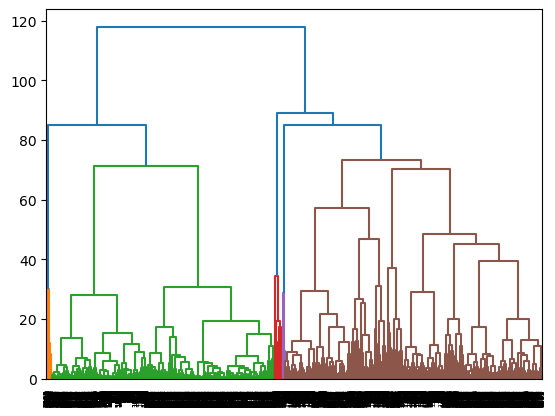

In [13]:
dendogram=sch.dendrogram(sch.linkage(Airlines_norm,method="ward"))

In [15]:
hc=AgglomerativeClustering(n_clusters=4,linkage="ward")
a=hc.fit(Airlines_norm)

In [17]:
a.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [29]:
cluster=pd.DataFrame(a.labels_,)
cluster.value_counts()

0    2093
1    1800
2      63
3      43
dtype: int64

In [27]:
Airlines.insert(loc=1,column="Cluster",value=cluster)

In [28]:
Airlines

,ID#,Cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,1,19244,0,1,1,1,215,2,0,0,6968,0
2,3,1,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,1,14776,0,1,1,1,500,1,0,0,6952,0
4,5,0,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,0,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,0,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,0,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,1,54899,0,1,1,1,500,1,500,1,1401,0


In [33]:
Airlines[Airlines["Cluster"]==0].shape

(2093, 13)

In [34]:
Airlines[Airlines["Cluster"]==1].shape


(1800, 13)

In [35]:
Airlines[Airlines["Cluster"]==2].shape

(63, 13)

In [36]:
Airlines[Airlines["Cluster"]==3].shape

(43, 13)

# KMEANS

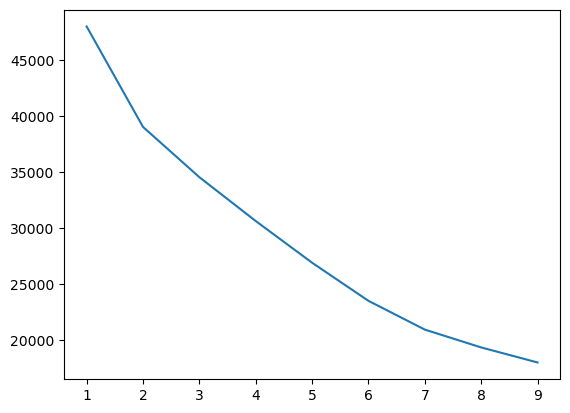

In [42]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=21)
    kmeans.fit(Airlines_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)

In [43]:
wcss

[47987.99999999998,
 39018.76857091044,
 34530.845086225694,
 30616.605164452176,
 26894.768692771802,
 23490.749028769853,
 20922.80816874208,
 19329.782382873615,
 17987.22946596101]

In [51]:
kmean=KMeans(n_clusters=2,random_state=21)
b=pd.DataFrame(kmean.fit_predict(Airlines_norm))
b.value_counts()

1    2674
0    1325
dtype: int64

# DBSCAN

In [57]:
dbscan=DBSCAN(eps=1.2,min_samples=5)
dbscan.fit(Airlines_norm)

DBSCAN(eps=1.2)

In [58]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [59]:
a=pd.DataFrame(dbscan.labels_,columns=["cluster"])
a

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [62]:
clustered=pd.concat([Airlines,a],axis=1)
clustered

,ID#,Cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,1,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,1,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,0,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,0,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,0,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,0,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,1,54899,0,1,1,1,500,1,500,1,1401,0,0


In [63]:
clustered_new=clustered[clustered["cluster"]==-1]
clustered_new.shape

(488, 14)

In [ ]:
488*